# Базовое решение Задачи 3 "Кластеризация физической активности"

В современном мире существуют множество различных устройств (фитнес-браслетов, камер, датчиков и т.д.), которые собирают данные об активности пользователя. Эти сведения могут быть использованы, например, для отслеживания состояния здоровья человека и определение находится ли он сейчас в безопасности, что он делает и так далее.

Данные, собранные с носимых устройств, которые отслеживают физическую активность пользователей, используются во множестве коммерческих приложений, включая здравоохранение, фитнес-тренировки, навигационную систему и так далее.

В данной задаче вам предлагается, используя информацию, собранную с помощью трех Инерциальных измерительных модуля (IMU) и пульсометра.

**Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:**
- 1 временная метка (с)
- 2 частота сердечных сокращений (уд/мин)
- 3-19 данные с датчиков на руке
- 20-36 данные с датчиков на груди
- 37-53 данные с датчиков на лодыжке

**Сенсорные данные IMU содержат следующие столбцы:**
- 1 температура (°C)
- 2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит
- 5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*
- 8-10 данных 3D-гироскопа (рад/с)
- 11-13 Данные 3D-магнитометра (мкТл)

In [430]:
# !pip install opendatasets --quiet

In [431]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/competitions/clustering-physical-activity-data")
# {"username":"adele1997","key":"72a5b06391529c16b0e444311c9af408"}

Skipping, found downloaded files in "./clustering-physical-activity-data" (use force=True to force download)


In [432]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [433]:
import pandas as pd

X = pd.read_csv("/content/clustering-physical-activity-data/Physical_Activity_Monitoring_unlabeled.csv")
X

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.8750,-9.084250,4.70122,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745,5
534597,2448.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200,5
534598,2479.84,34.6875,-6.367550,2.32131,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899,5
534599,3437.82,28.0625,5.461940,10.43640,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815,6


In [434]:
X.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [435]:
X.shape

(534601, 53)

In [436]:
missing_values = X.isnull().sum()  # Количество пропусков
total_rows = len(X)  # Общее число строк

# Фильтруем только столбцы с пропусками
missing_data = missing_values[missing_values > 0].to_frame(name="Missing Count")
missing_data["Missing Percentage"] = (missing_data["Missing Count"] / total_rows) * 100

missing_data

,Missing Count,Missing Percentage
handTemperature,4041,0.755891
handAcc16_1,4041,0.755891
handAcc16_2,4041,0.755891
handAcc16_3,4041,0.755891
handAcc6_1,4041,0.755891
handAcc6_2,4041,0.755891
handAcc6_3,4041,0.755891
handGyro1,4041,0.755891
handGyro2,4041,0.755891
handGyro3,4041,0.755891


In [437]:
missing_data.shape

(51, 2)

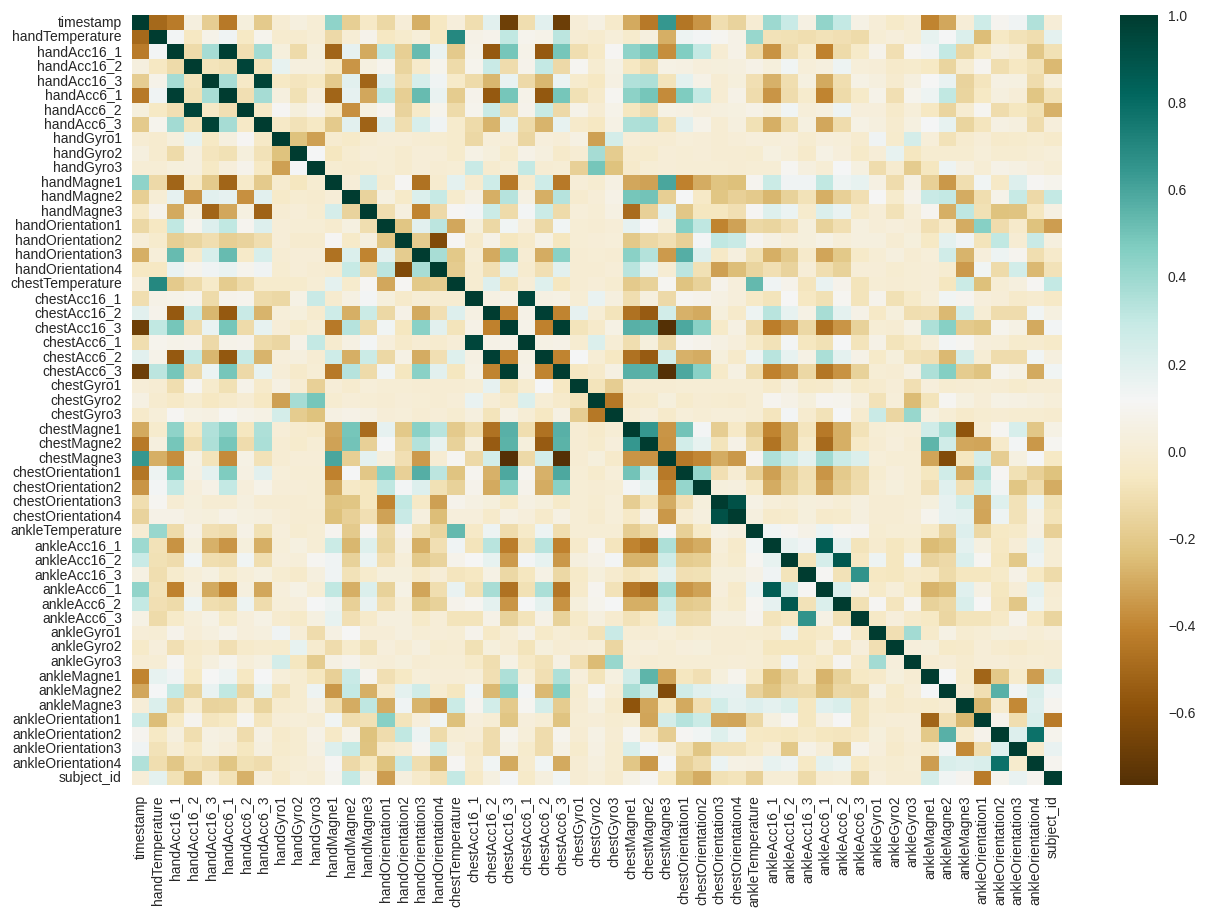

In [438]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = X.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

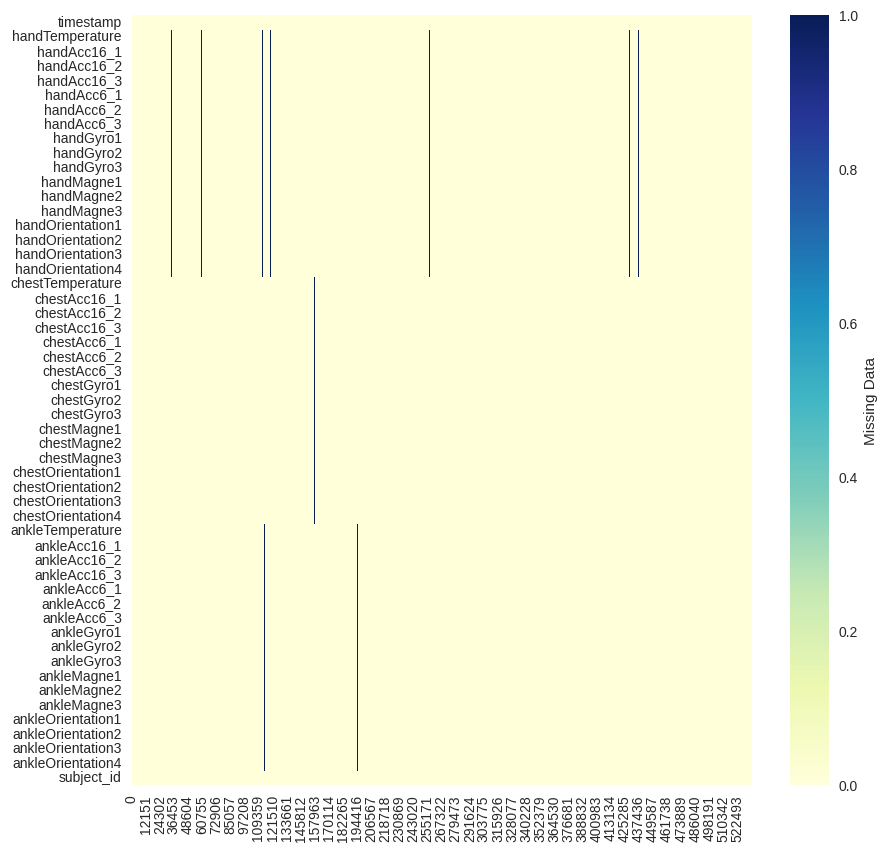

In [439]:
plt.figure(figsize=(10,10))
sns.heatmap(X.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

**Библиотека визуализации пропусков:**

`pip install missingno`

In [440]:
import missingno as msno

<Axes: >

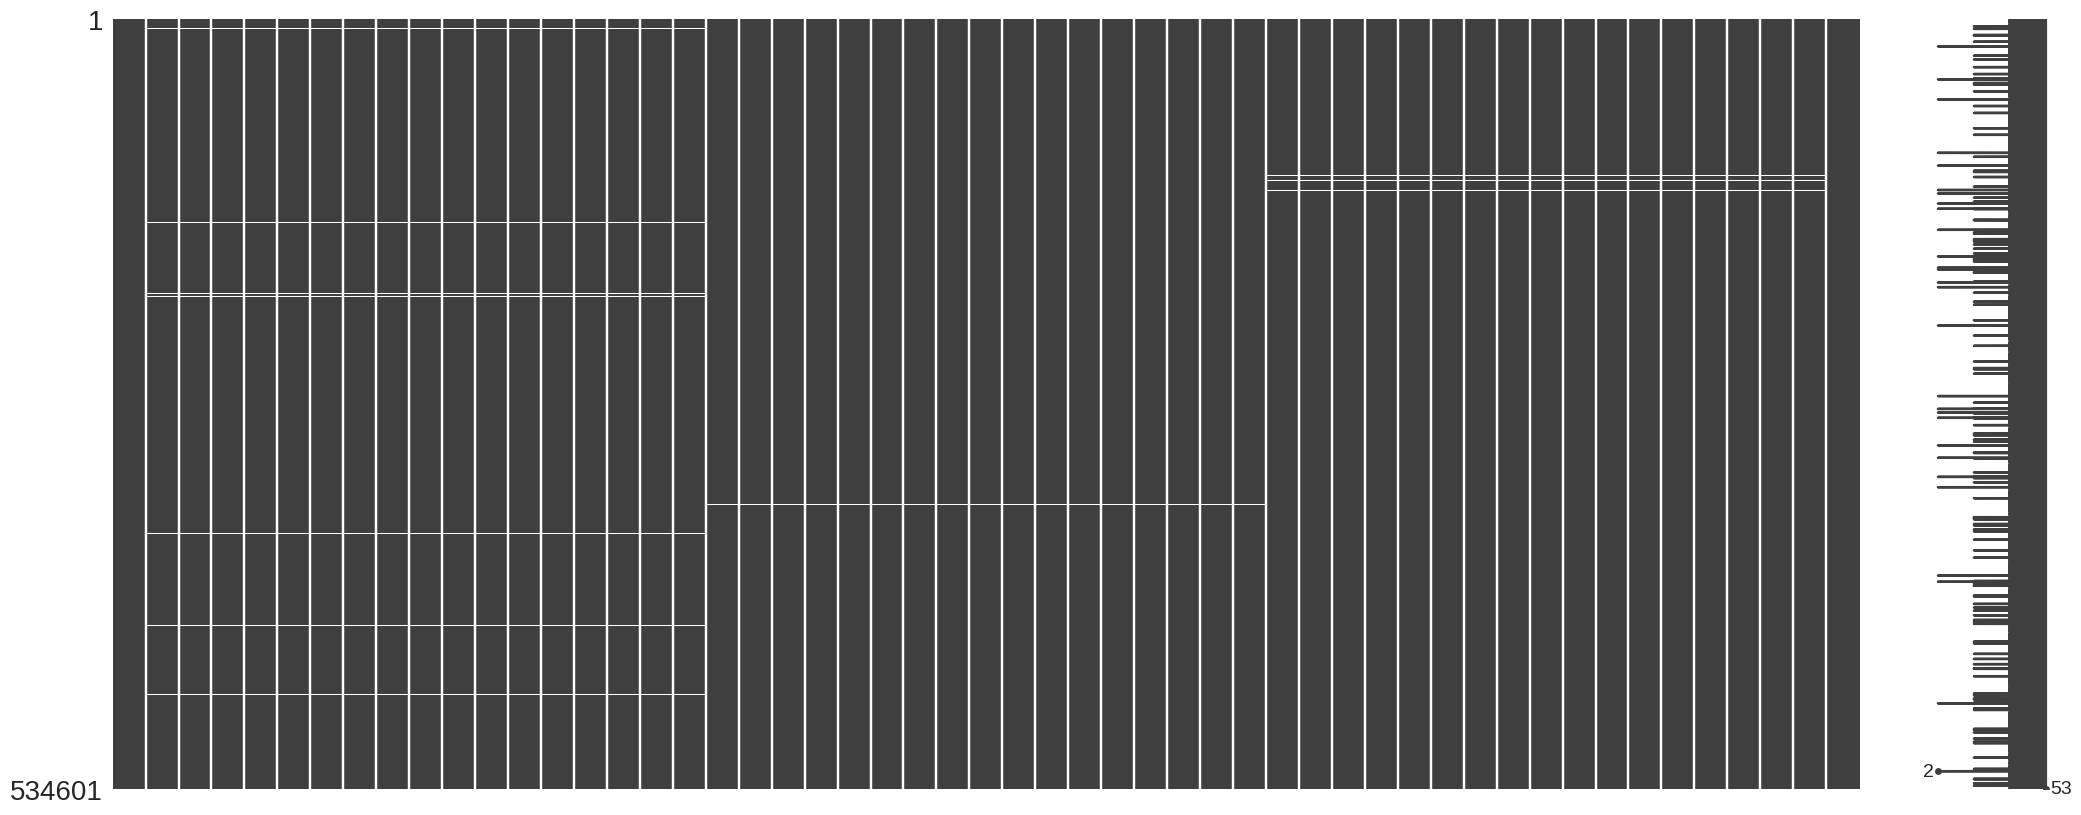

In [441]:
msno.matrix(X)

**Ка видим в данных у нас имеются множество пропущенных значений.**

Так как датасет собран из реальных данных, то в жизни случается всякое.

Пустые значения в данном случае могут быть обусловлены следующими факторами:
* Потеря данных из-за использования беспроводных датчиков.
* Проблемы с настройкой оборудования, вызывающие, например. потерю соединения с датчиками или системный сбой.

Существуют две основные стратегии при работе с пропусками:
1. Удаление пропущенных значений
2. Заполнение пропусков

**Удаление.**

При удалении пропусков можно:
1. Удалять как целиком какой-то признак (например, если больше 70% для этого признака это пропуски, тогда мы можем целиком удалить данный столбец):
`df.drop(columns='name'])`

2. Удалить можно объекты у которых имеются пропущенные значения, т.е. в данном случае мы удаляем строки. *Но будьте внимательны так как удалять из тестового набора данных не всегда возможно, иначе размерность ответов не совпадет.*
`df.dropna()`

In [442]:
# В качестве примера удалим из набора данных признаки, пропуски в которых превыщают 75%
X.drop(columns=['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
                 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
                 'handOrientation3', 'handOrientation4'], inplace=True)
X.isna().sum()

,0
timestamp,0
chestTemperature,809
chestAcc16_1,809
chestAcc16_2,809
chestAcc16_3,809
chestAcc6_1,809
chestAcc6_2,809
chestAcc6_3,809
chestGyro1,809
chestGyro2,809


**Заполнение.**

При заполнении пропусков также существует множество различных стратегий:
- заполнение пропусков с помощью **среднего/медианы/максимума/минимум** по данному признаку.
- при категориальных признаках пропуски можно заполнить пропущенные значения с помощью наиболее часто встречающейся категории по данному признаку (**модой**).
- используя **интерполяцию** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.
- используя различные **другие алгоритмы машинного обучения** для заполнения пропусков (представьте, что все строки с пропусками - это тестовый набор данных, для которого вам нужно вернуть ответ).

Табличка в помощь:
https://help.loginom.ru/userguide/processors/preprocessing/imputation.html

In [443]:
X.columns

Index(['timestamp', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

In [444]:
# Заполним пропуски с помощью среднего значения

col_missing = ['chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
               'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
               'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
               'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
               'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
               'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
               'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

for i in col_missing:
    X[i].fillna(X[i].mean(), inplace=True)

X.isna().sum()

,0
timestamp,0
chestTemperature,0
chestAcc16_1,0
chestAcc16_2,0
chestAcc16_3,0
chestAcc6_1,0
chestAcc6_2,0
chestAcc6_3,0
chestGyro1,0
chestGyro2,0


In [445]:
X = X.drop(columns=['timestamp'])

In [446]:
X.isna().sum().sum()

np.int64(0)

## Кластеризация

Для кластеризации в данном примере мы будем использовать **KMeans**.

In [447]:
%%time
from sklearn.cluster import KMeans

n_clusters = 10

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(X)

# inertia
inertia = clusterer.inertia_

CPU times: user 4.36 s, sys: 154 ms, total: 4.51 s
Wall time: 4.47 s


In [448]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 10 , the inertia is : 490523648.59418476


In [449]:
%%time
from sklearn.metrics import silhouette_score

#silhouette_avg = silhouette_score(X, cluster_labels)

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 13.1 µs


**Как оценить качество получившегося кластерного разбиения?**

**Коэффициент Силуэтта**

К-т Силуэтта (англ *Silhouette*) - это метрика, которая не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.

Интуитивное описание метрики:
* точки внутри кластера должны лежать очень близко друг к другу, то есть кластер должен быть *плотным*
* сами кластера должны лежать как можно дальше друг от друга

Метрика силуэта позволяет учитывать оба этих факта в одной формуле.

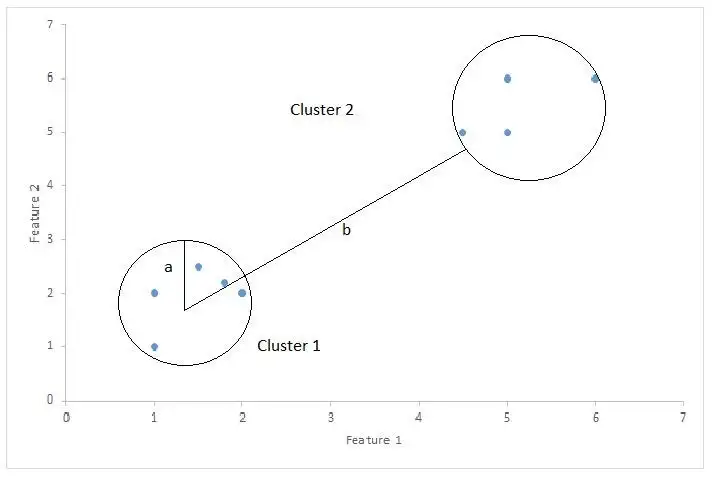

Чтобы вычислить его для каждого объекта нужно вычислить для каждого объекта выборки две величины, $a$ (среднее расстояние от данного объекта до объектов из того же кластера) и $b$ (среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект)).

Силуэтом объекта назовём нормализованную разность между этими величинами

$$
s = \frac{b-a}{\max(a,b)}
$$

Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Эта величина меняется в интервале от $-1$ до $1$:

* -1 значит что кластера плохие, размытые
* 0 значит что кластера накладываются друг на друга
* 1 значит что кластера плотные и хорошо отделены друг от друга

Таким образом, чем ближе значение к-та Силуэтта в единице, тем лучше. Все, что больше $0.5$ хорошие значения, всё что меньше - надо улучшать.

Формулу реализовывать не надо, она уже есть в *sklearn*. Для примера загрузим наш датасет с кластеризацией:

**Инерция**

Инерция показывает, насколько когерентны различные кластеры.

Вычисляется по следующей формуле:

$inertia = \sum_{i=1}^N (x_i - C_k)$

* N — количество выборок в наборе данных
* C — центр кластера.

Таким образом, Inertia просто вычисляет квадрат расстояния от каждой выборки в кластере до его центра кластера и суммирует их. Этот процесс выполняется для каждого кластера и всех выборок в этом наборе данных. Чем меньше значение Inertia, тем более когерентны различные кластеры. Когда добавляется столько кластеров, сколько имеется выборок в наборе данных, значение инерции будет равно нулю.

In [450]:
# print("For n_clusters =", n_clusters,
#      ", the silhouette is :", silhouette_avg)

(534601, 35)


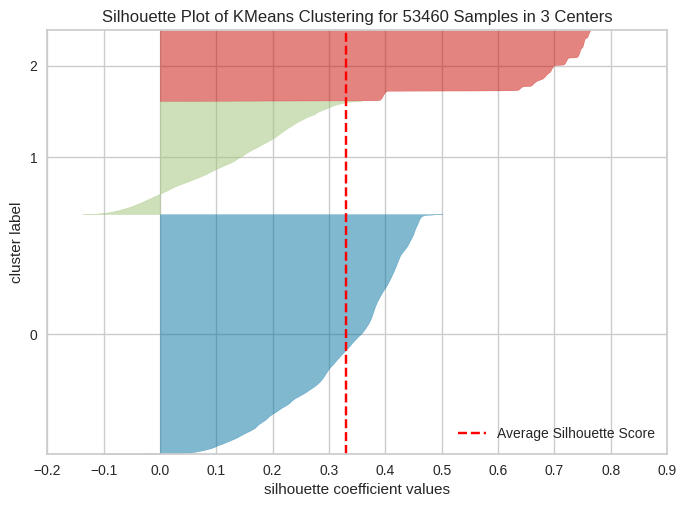

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [451]:
from yellowbrick.cluster import silhouette_visualizer

X_tmp = X.sample(frac=0.1)
print(X.shape)
silhouette_visualizer(KMeans(3, random_state=42), X_tmp, colors='yellowbrick')

In [452]:
# plt.figure(figsize=(10,10))

# plt.scatter(X.iloc[:, 1], X.iloc[:, 4], c=cluster_labels, edgecolor='k')

# centers = clusterer.cluster_centers_

# plt.scatter(centers[:, 1], centers[:, 4], marker='o',
#             c="white", alpha=1, s=200, edgecolor='k')

# for i, c in enumerate(centers):
#    plt.scatter(c[1], c[4], marker='$%d$' % i, alpha=1,
#                s=50, edgecolor='k')

#plt.title("Distributed based on clusters");

In [453]:
import numpy as np

len(np.unique(cluster_labels))

10

## Оптимальное количество кластеров

**В данном примере, мы выбрали рандомное число кластеров. И тут встает вопрос как подобрать оптимальное и подходящее количество кластеров для датасета?**

https://habr.com/ru/company/jetinfosystems/blog/467745/

Собственно используя коэффицент Силуэта и инерцию, можно додобрать оптимальное количество кластеров, а также гиперпараметры для KMeans.

**Существует несколько различных стратегий подбора оптимального количества кластеров:**
1. Метод локтя
2. Gap-Statistics (https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29)
3. Метод силуэтов https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### Метод локтя

**Метод локтя** – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

**Метод "локтя" (elbow method)** рассматривает характер изменения разброса  $W_{total}$  с увеличением числа групп  $k$ . Объединив все {n} наблюдений в одну группу, мы имеем наибольшую внутрикластерную дисперсию, которая будет снижаться до 0 при  $k→n$ . На каком-то этапе можно усмотреть, что снижение этой дисперсии замедляется - на графике это происходит в точке, называемой "локтем". Построить такой график можно в результате прямого перебора.

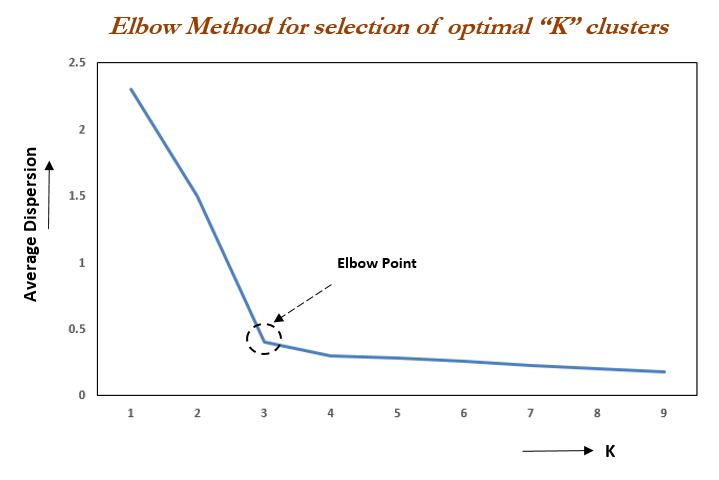

In [469]:
%%time
from sklearn.cluster import KMeans

inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])

for n_clusters in range(3, 30):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

CPU times: user 2min 49s, sys: 3.53 s, total: 2min 52s
Wall time: 2min 33s


<Axes: >

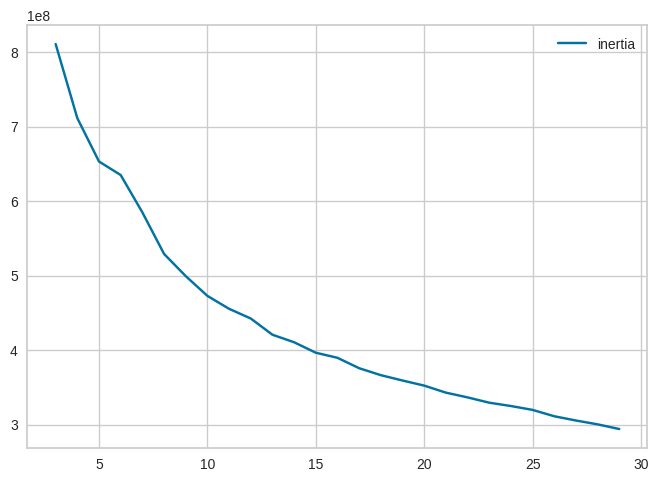

In [470]:
inertia_df.plot()

(53460, 35)


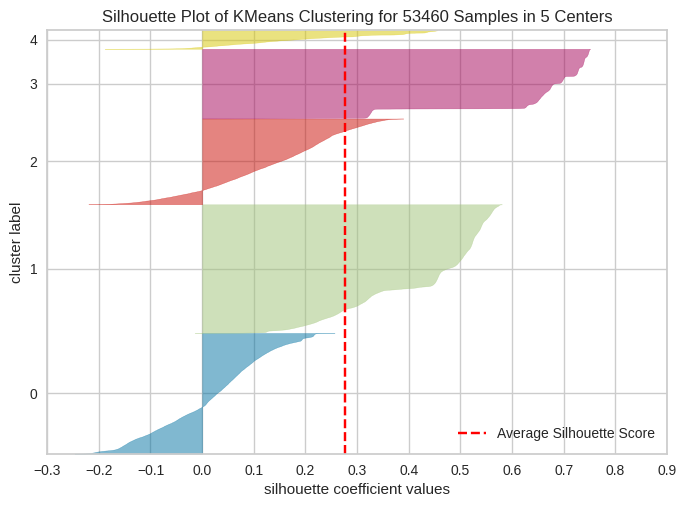

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))

In [456]:
from yellowbrick.cluster import silhouette_visualizer

X_tmp = X.sample(frac=0.1)
print(X_tmp.shape)
silhouette_visualizer(KMeans(5, random_state=42), X_tmp, colors='yellowbrick')

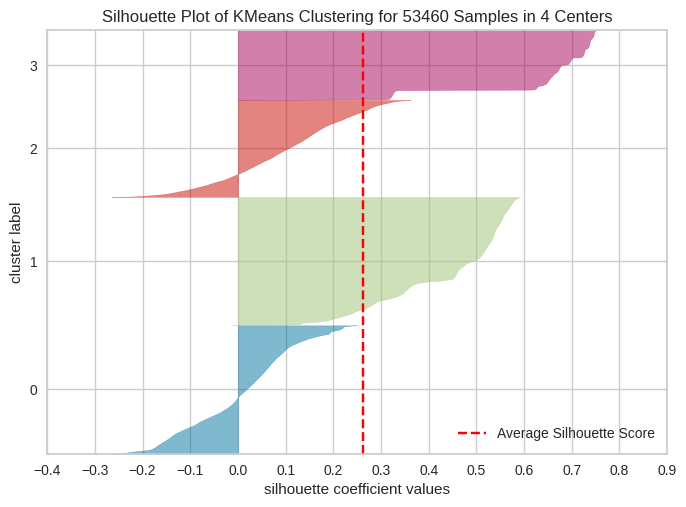

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [457]:
silhouette_visualizer(KMeans(4, random_state=42), X_tmp, colors='yellowbrick')

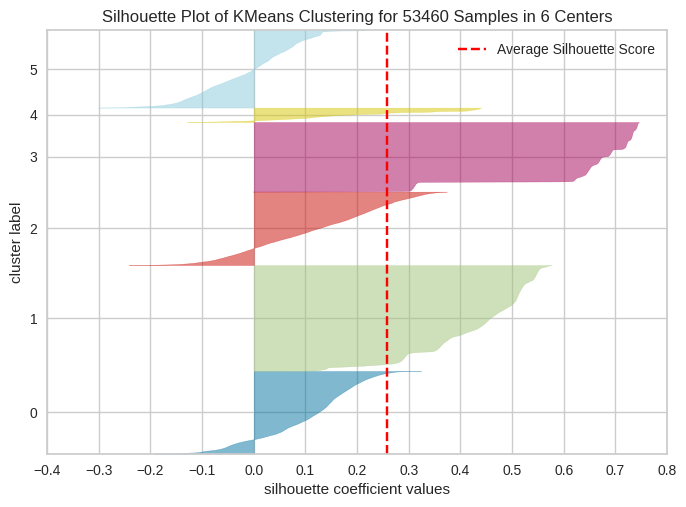

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=42))

In [458]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(6, random_state=42), X_tmp, colors='yellowbrick')

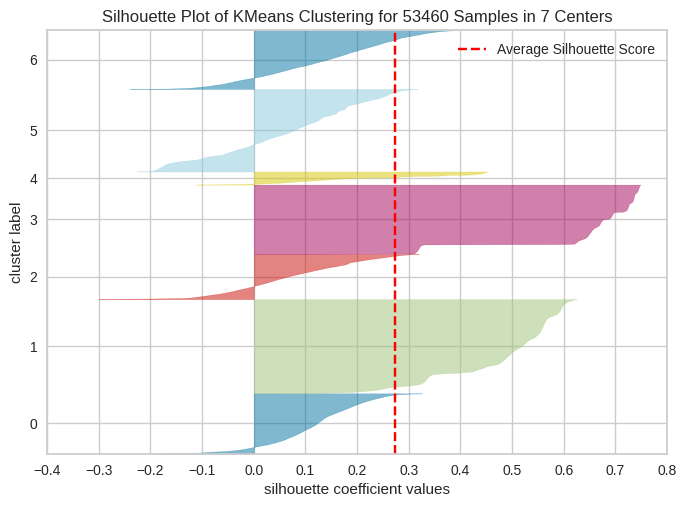

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=7, random_state=42))

In [459]:
silhouette_visualizer(KMeans(7, random_state=42), X_tmp, colors='yellowbrick')

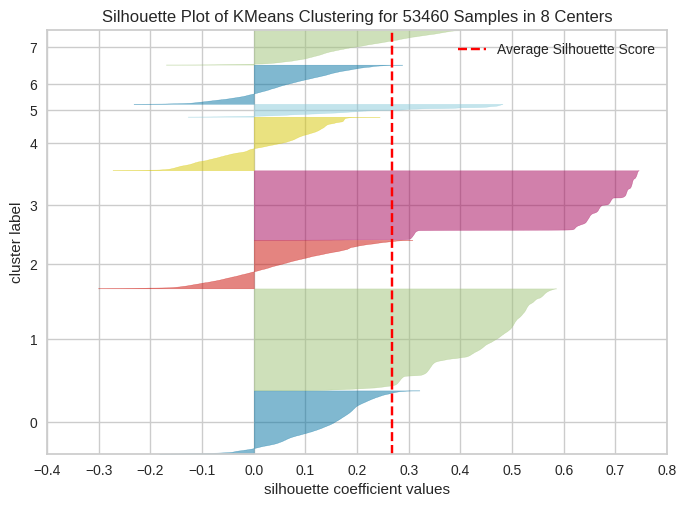

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 53460 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(random_state=42))

In [460]:
silhouette_visualizer(KMeans(8, random_state=42), X_tmp, colors='yellowbrick')

## Подготовка ответов

In [501]:
%%time
from sklearn.cluster import KMeans

n_clusters = 4

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(X)

# inertia
inertia = clusterer.inertia_

CPU times: user 2.11 s, sys: 150 ms, total: 2.26 s
Wall time: 2.14 s


In [502]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])

predictions

,activityID
0,1
1,0
2,2
3,3
4,2
...,...
534596,0
534597,3
534598,3
534599,2


In [503]:
unique_labels = predictions['activityID'].unique()

In [504]:
mapping_dict = {old_label: new_label for new_label, old_label in enumerate(unique_labels, start=1)}
predictions['activityID'] = predictions['activityID'].map(mapping_dict)
predictions = predictions.reset_index()
predictions.columns = ['index', 'activityID']

In [505]:
predictions.to_csv('predict.csv', index=False)

print("Файл predict.csv успешно создан!")

Файл predict.csv успешно создан!


**Пример того как преобразовать номера кластеров.**

In [466]:
import pandas as pd

d = {"f1":pd.Series([100, 20, 3, 5, 200, 400, 2, 282]),
     "f2": pd.Series(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']),
     "label": pd.Series([2, 0, 1, 1, 2, 0, 1, 2])}


df0 = pd.DataFrame(d)
df0

,f1,f2,label
0,100,v1,2
1,20,v2,0
2,3,v3,1
3,5,v4,1
4,200,v5,2
5,400,v6,0
6,2,v7,1
7,282,v8,2


In [467]:
df0['label'].unique()

array([2, 0, 1])

In [468]:
df0['new_label'] = -1

for index, row in df0.iterrows():
    if row['label'] == 2:
        df0.loc[index, 'new_label'] = 1
    if row['label'] == 0:
        df0.loc[index, 'new_label'] = 2
    if row['label'] == 1:
        df0.loc[index, 'new_label'] = 3

df0

,f1,f2,label,new_label
0,100,v1,2,1
1,20,v2,0,2
2,3,v3,1,3
3,5,v4,1,3
4,200,v5,2,1
5,400,v6,0,2
6,2,v7,1,3
7,282,v8,2,1
